<h1 align="center">
The Detroit Difference
</h1>

![alt text](http://cdn4.hotelopia.com/destinations/d/DTW.jpg "Detroit, Michigan")

<h2 align="center">
Presented to the NYU Stern School of Business
</h2>

<h3 align="center">
Maggie West 
</h3>
<h3 align="center">
Email: mmw480@nyu.edu
</h3>
***

<h3 align='left'>
Abstract
</h3>

**Background:** 
Detroit, Michigan has a long history of technological and industrial entrepreneurship, from being the birthplace of the assembly line to being a hub for the tech start-up and venture capital scene. While [deindustrialization](https://scholarworks.gvsu.edu/cgi/viewcontent.cgi?article=1184&context=mcnair), [depopulation](http://www.detroitnews.com/story/news/local/detroit-city/2016/05/19/detroit-population-rank-lowest-since/84574198/), and a series of [financial crises](https://www.michigan.gov/documents/detroitcantwait/DetroitFactSheet_412909_7.pdf) have plagued Detroit and damaged its reputation for potential investors starting in the 1970’s, [large-scale projects](http://downtowndetroit.org/do-business/development-projects/) set to build new commercial facilities and hospitality infrastructure, revitalize neighborhoods, and improve recreational and public facilities have created new hope for the city to return to its former glory.
 

**Objective:**
This project aims to analyze the current state of competitiveness of Detroit's economy based on factors such as cost of living, demographics of residents and productivity (GDP). To get a sense of how competitive Detroit's economy is based on these elements, this project will compare the same economic considerations with a similarly populated city, Portland, Oregon. 

**Considerations:**
The three factors (cost of living, demographics of residents and productivity) this project employs to assess the economic advantage of Detroit are based on [the considerations](https://hbr.org/2017/09/what-amazons-hq2-wish-list-signals-about-the-future-of-cities%20) the Amazon Corperation is utilizing in its valuation of major metropolitan areas that would be suited to host its second headquarters in the United States. While these are not the only factors that Amazon takes into account in this analysis, they are the three factors that are most universal across industries that can also be represented by the reliable datasets discovered for this project. 


***

<h3 align='left'>
Preliminaries
</h3>

In order to import and represent the data for this project, the following packages should be imported. 

In [135]:
# Import packages 


import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import statsmodels.formula.api as smf  #stat module for regression

import os                       # operating system tools (check files)
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 

%matplotlib inline                     

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.21.0
Today:  2017-12-21


<h3 align='left'>
Data Sources
</h3>

There are two datasets I will be relying on for this project:

I. 2017 demographic and economic datasets of both [Detroit](https://www.census.gov/quickfacts/fact/table/detroitcitymichigan/PST045216) and [Portland](https://www.census.gov/quickfacts/fact/table/portlandcityoregon/PST045216) by the US Census Bureau.

II. GDP datasets of Detroit and Portland are by U.S. Bureau of Labor Statistics, condensed by the [Statista Organization](https://www.statista.com/statistics/183873/gdp-of-the-detroit-metro-area/).

**Directory Consideration: **  The best way to access this data is to download the datasets (linked above and available in this github repository). In my "url" directories, I direct Pandas to access the datasets from my Jupyter files; in order to execute my code below, it is best to edit the path to where you've stored the data on your device.  

***

<h3 align='left'>
I. Detroit Demographics
</h3>

The key features of the demographic data of Detroit, Michigan used in this project are a) population and b) percentage of population with Bachelor's Degree or higher.

**First, Import Census Data on the City of Detroit, Michigan**

In [130]:
# don't forget to change url path to that of your device. Ex: url=("/Users/name/folder/detroit_census.csv") 
url=("/Users/maggiewest/Projects/detroit_census.csv")
detroit_census = pd.read_csv(url)

In [131]:
# Clean up the dataset for viewing purposes
detroit_census2=detroit_census.drop("Fact Note", axis=1)
detroit_census2=detroit_census2.drop("Value Note for Detroit city, Michigan", axis=1)

**Population of Detroit**

The estimated population of Detroit in 2016 is 672,795 persons.

In [134]:
detroit_census2.head(1)

,Fact,"Detroit city, Michigan"
0,"Population estimates, July 1, 2016, (V2016)","672,795"


**Education level of Detroit**

13.5% of Detroit's population (approximately 90,827 Detroit residents) have earned a Bachelor's Degree or higher degree of education.  

In [110]:
d_education=detroit_census2.drop(detroit_census2.index[36:])
d_education=d_education.drop(d_education.index[:34])
d_education.head()

,Fact,"Detroit city, Michigan"
34,"High school graduate or higher, percent of per...",78.3%
35,"Bachelor's degree or higher, percent of person...",13.5%


<h3 align='left'>
II. Detroit's Productivity
</h3>

In 2013, the city of Detroit filed for Chapter 9 bankruptcy. This remains the largest municipal bankruptcy filing in U.S. history by debt, estimated at $18–20 billion. The dataset used in this section was created by the [Federal Bureau of Economic Analysis](https://www.bea.gov/itable/iTable.cfm?ReqID=70&step=1#reqid=70&step=10&isuri=1&7003=200&7035=-1&7004=naics&7005=-1&7006=19820&7036=-1&7001=2200&7002=2&7090=70&7007=2016,2015,2014,2013,2012,2011,2010&7093=levels) and can be found in their interactive datasets database by searching for "Gross domestic product (GDP) by metropolitan area" and then selecting the results for Detroit, Michigan.

The Federal Bureau of Economic Analysis' calculation of GDP is equivalent to the total value of the goods and services produced by the metropolitan area less the value of the goods and services used up in production. By selecting data from 2001 to 2016, the data below demonstrates how Detroit's productivity has changed between these years. It's interested to note the dip in 2009 from the economic recession and the slight reduction in positive productivity growth during 2013. 

In [136]:
url=("/Users/maggiewest/Projects/detroit_gdp.csv")
gdp_df = pd.read_csv(url)

In [137]:
gdp_df=gdp_df.rename(index=str, columns={"TIME_PERIOD": "Year", "All industry total [Detroit-Warren-Dearborn MI (Metropolitan Statistical Area)]": "Detroit GDP"})

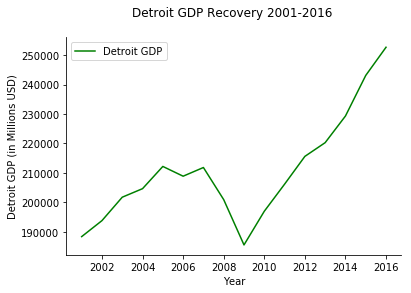

In [153]:
ax=gdp_df.plot(x='Year', y="Detroit GDP", title='Detroit GDP Recovery 2001-2016 \n', color='green')
ax.set_xlabel("Year")
ax.set_ylabel("Detroit GDP (in Millions USD)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In 2016, the [Federal Bureau of Economic Analysis](https://bea.gov/newsreleases/regional/gdp_metro/2017/pdf/gdp_metro0917.pdf) reported the Greater Detroit metropolitan's GDP at $252.7 billion, making it the 13th largest economy among 382 metropolitan areas in the United States. 


<h3 align='left'>
III. Cost of Living in Detroit
</h3>

Determining the cost-of-living for any city requires the consideration of housing affordability, transportation expenses, food prices, etc. The median housing costs, median salary, median travel time  and percentage of population in poverty in Detroit below is retrieved from the US Census Bureau.

In [171]:
url=("/Users/maggiewest/Projects/cpi3.xlsx")
cpi = pd.read_excel(url)

In [200]:
#housing prices
d_housing=detroit_census2.drop(detroit_census2.index[:24])
d_housing=d_housing.drop(d_housing.index[5:])
d_housing

,Fact,"Detroit city, Michigan"
24,"Owner-occupied housing unit rate, 2011-2015",49.4%
25,"Median value of owner-occupied housing units, ...","$42,300"
26,Median selected monthly owner costs -with a mo...,"$1,080"
27,Median selected monthly owner costs -without a...,$439
28,"Median gross rent, 2011-2015",$747


In [188]:
d_salary=detroit_census2.drop(detroit_census2.index[:46])
d_salary=d_salary.drop(d_salary.index[50:])
d_salary.head(4)

,Fact,"Detroit city, Michigan"
46,"Mean travel time to work (minutes), workers ag...",26.8
47,"Median household income (in 2015 dollars), 201...","$25,764"
48,Per capita income in past 12 months (in 2015 d...,"$15,038"
49,"Persons in poverty, percent",40.3%


<h3 align='left'>
IV. Looking at Portland, Oregon for Competitiveness Comparison
</h3>

In order to get a better understanding of Detroit's economic competitiveness, the demographics and cost of living of Portland, Oregon will be used for comparison. Portland is a valid economic comparison to Detroit as it has a similar population size. While Detroit has undergone unique economic challenges that have impacted both its population size and economic productivity, there isn't a similarly sized U.S. city that these factors also apply to; thus, population size is our best means of comparison.

**Population of Detroit Compared to Portland**

In [62]:
# portland census data
url=("/Users/maggiewest/Projects/Portland_census.csv")
portland_census = pd.read_csv(url)
portland_census2=portland_census.drop("Fact Note", axis=1)
portland_census2=portland_census2.drop("Value Note for Portland city, Oregon", axis=1)

In [173]:
# Merge the two datasets
newest=pd.merge(detroit_census2, portland_census2, how='inner',
                         left_on = "Fact", right_on = "Fact", indicator = True)
population=newest.drop(newest.index[1:])
population.head()

,Fact,"Detroit city, Michigan","Portland city, Oregon",_merge
0,"Population estimates, July 1, 2016, (V2016)","672,795","639,863",both


**Education level of Portland**

While 13.5% of Detroit's population (approximately 90,827 Detroit residents) have earned a Bachelor's Degree or higher degree of education, a whopping 47% (approximately 300,735 Portland residents) have earned a Bachelor's Degree or higher degree of education. 

In [109]:
p_education=portland_census2.drop(portland_census2.index[39:])
p_education=p_education.drop(p_education.index[:37])
p_education.head()

,Fact,"Portland city, Oregon"
37,"High school graduate or higher, percent of per...",91.6%
38,"Bachelor's degree or higher, percent of person...",47.0%


**Cost of Living: Detroit vs. Portland** 

Housing costs and cost of rent in Portland are represented by the data below, collected from the US Census Bureau. 

In [192]:
p_housing=portland_census2.drop(portland_census2.index[:26])
p_housing.head(6)

,Fact,"Portland city, Oregon"
26,"Housing units, April 1, 2010","265,439"
27,"Owner-occupied housing unit rate, 2012-2016",53.1%
28,"Median value of owner-occupied housing units, ...","$319,400"
29,Median selected monthly owner costs -with a mo...,"$1,787"
30,Median selected monthly owner costs -without a...,$602
31,"Median gross rent, 2012-2016","$1,025"


In [191]:
p_salary=portland_census2.drop(portland_census2.index[:49])
p_salary.head(3)

,Fact,"Portland city, Oregon"
49,"Mean travel time to work (minutes), workers ag...",25.6
50,"Median household income (in 2016 dollars), 201...","$58,423"
51,Per capita income in past 12 months (in 2016 d...,"$34,778"


The mean travel time to work is 25.6 minutes in Portland, compared to 26.8 in Detroit. Additionally, the median household income is higher in Portland at 58,423 dollars, where Detroit is 25,764 dollars. The per capita income is also higher in Portland, at 34,778 dollars while Detroit's sits at 15,038 dollars.

***

<h3 align='left'>
III. Conclusion
</h3>

Based on the data above, it is clear that while Detroit's productivity has rebounded since its bankrupcy in 2013 (in addition to its other financial crises over the years), it does not compare well along the lines of the education-level and income of its residents. 

**Limitations of analysis** 

While the demographic and cost of living data did not look well on Detroit when compared to a similarly-populated city, it is possible that the definition of what consistitutes Detroit may have played a role in these numbers. The urban-suburban divide within the Greater Detroit metropolitan area is drawn along educational and socio-economic lines. Considering the mean travel time to work in Detroit is 26.8 minutes, it would make sense that much of the working population in the Greater Detroit area come from the suburbs to work in the city. The high poverty rates are likely found within the city itself, and the low rates of higher education (Bachelor's degree or higher) may exclude those who work in the city and do not live there (such as those who live in the wealthy suburbs such as the cities of Troy and Rochester, right outside of the Greater Detroit metropolitan area). Some information on the disparity in Metro Detroit and Greater Detroit's economic and educational development can be found [here](https://www.nap.edu/read/6038/chapter/4).

***